In [1]:
import bk_clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_list = [1, 10, 100, 1000, 10000]
desired_std_dev = 2.5

In [3]:
n_clusters_dict = {}
cluster_size = 10

for n_clusters in n_list:
    n_clusters_arr = [
        np.random.normal(
            loc=n * desired_std_dev * 10, scale=desired_std_dev, size=[cluster_size, 1]
        )
        for n in range(n_clusters)
    ]
    n_clusters_dict[n_clusters] = np.vstack(n_clusters_arr)

In [4]:
n_clusters_dict.keys()

dict_keys([1, 10, 100, 1000, 10000])

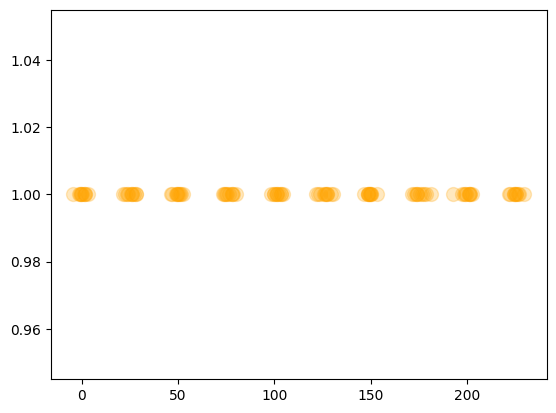

In [5]:
x = 10
plt.scatter(
    x=n_clusters_dict[x].flatten(), y=np.ones(10 * x), alpha=0.25, c="orange", s=100
)

In [6]:
bk_model = bk_clustering.BurjKhalifaClustering()

In [7]:
bk_model.fit(n_clusters_dict[x])
bk_model.n_clusters

10

In [8]:
from itertools import product

combs = [i for i in product(n_list, repeat=2)]

In [9]:
combs

[(1, 1),
 (1, 10),
 (1, 100),
 (1, 1000),
 (1, 10000),
 (10, 1),
 (10, 10),
 (10, 100),
 (10, 1000),
 (10, 10000),
 (100, 1),
 (100, 10),
 (100, 100),
 (100, 1000),
 (100, 10000),
 (1000, 1),
 (1000, 10),
 (1000, 100),
 (1000, 1000),
 (1000, 10000),
 (10000, 1),
 (10000, 10),
 (10000, 100),
 (10000, 1000),
 (10000, 10000)]

In [10]:
import typing
from timeit import default_timer as timer
from tqdm import tqdm


class Combination(typing.NamedTuple):
    number_of_datarows: int
    number_of_datacols: int


combination = Combination(*combs[3])
combination

Combination(number_of_datarows=1, number_of_datacols=1000)

In [11]:
def generate_data(combination):
    n_clusters_arr = [
        np.random.normal(
            loc=n * desired_std_dev * 10,
            scale=desired_std_dev,
            size=[
                combination.number_of_datarows // number_of_clusters + 1,
                combination.number_of_datacols,
            ],
        )
        for n in range(number_of_clusters)
    ]

    return np.vstack(n_clusters_arr)

In [12]:
"""
number_of_clusters = 10
timer_dict_10 = {}
for x in tqdm(range(len(combs))):
    start = timer()
    
    bk_model = bk_clustering.BurjKhalifaClustering()
    combination = Combination(*combs[x])
    if combination.number_of_datarows * combination.number_of_datacols >= number_of_clusters:
        bk_model.fit(generate_data(combination))
        timer_dict_10[combs[x]] = timer() - start
    
bk_clustering.utilities.load_save.save_json(timer_dict_10, "./../results/aggregations/time_performance_10.json")
"""

'\nnumber_of_clusters = 10\ntimer_dict_10 = {}\nfor x in tqdm(range(len(combs))):\n    start = timer()\n    \n    bk_model = bk_clustering.BurjKhalifaClustering()\n    combination = Combination(*combs[x])\n    if combination.number_of_datarows * combination.number_of_datacols >= number_of_clusters:\n        bk_model.fit(generate_data(combination))\n        timer_dict_10[combs[x]] = timer() - start\n    \nbk_clustering.utilities.load_save.save_json(timer_dict_10, "./../results/aggregations/time_performance_10.json")\n'

In [13]:
"""
number_of_clusters = 100
timer_dict_100 = {}
for x in tqdm(range(len(combs))):
    start = timer()
    
    bk_model = bk_clustering.BurjKhalifaClustering()
    combination = Combination(*combs[x])
    if combination.number_of_datarows * combination.number_of_datacols >= number_of_clusters:
        bk_model.fit(generate_data(combination))
        timer_dict_100[combs[x]] = timer() - start
    
bk_clustering.utilities.load_save.save_json(timer_dict_100, "./../results/aggregations/time_performance_100.json")
"""

'\nnumber_of_clusters = 100\ntimer_dict_100 = {}\nfor x in tqdm(range(len(combs))):\n    start = timer()\n    \n    bk_model = bk_clustering.BurjKhalifaClustering()\n    combination = Combination(*combs[x])\n    if combination.number_of_datarows * combination.number_of_datacols >= number_of_clusters:\n        bk_model.fit(generate_data(combination))\n        timer_dict_100[combs[x]] = timer() - start\n    \nbk_clustering.utilities.load_save.save_json(timer_dict_100, "./../results/aggregations/time_performance_100.json")\n'

In [14]:
timer_dict_10 = bk_clustering.utilities.load_save.load_json(
    "./../results/aggregations/time_performance_10.json"
)
timer_dict_10 = {eval(k): v for (k, v) in timer_dict_10.items()}

timer_dict_100 = bk_clustering.utilities.load_save.load_json(
    "./../results/aggregations/time_performance_100.json"
)
timer_dict_100 = {eval(k): v for (k, v) in timer_dict_100.items()}

In [15]:
matrix_10 = np.empty((len(n_list), len(n_list)))
matrix_100 = np.empty((len(n_list), len(n_list)))

matrix_10[:] = np.nan
matrix_100[:] = np.nan

In [16]:
for _set in timer_dict_10:
    matrix_10[n_list.index(_set[0]), n_list.index(_set[1])] = timer_dict_10[_set]

for _set in timer_dict_100:
    matrix_100[n_list.index(_set[0]), n_list.index(_set[1])] = timer_dict_100[_set]

Text(0.5, 36.72222222222221, 'number_of_datacols')

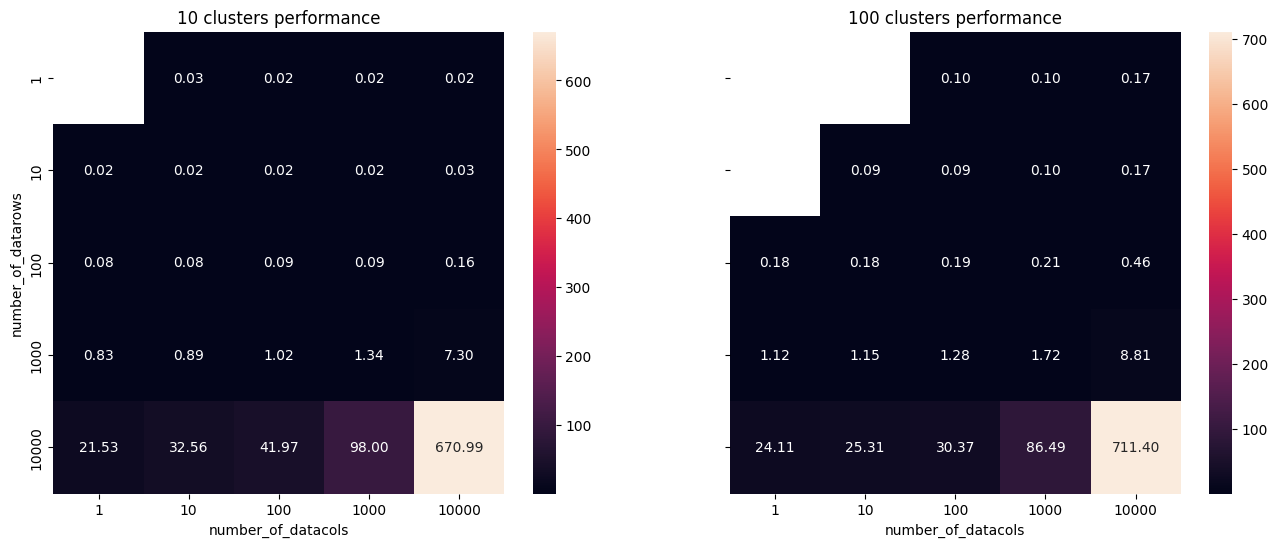

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.heatmap(
    matrix_10, annot=True, fmt=".2f", xticklabels=n_list, yticklabels=n_list, ax=axs[0]
)
sns.heatmap(
    matrix_100, annot=True, fmt=".2f", xticklabels=n_list, yticklabels=n_list, ax=axs[1]
)

axs[0].set_title("10 clusters performance")
axs[1].set_title("100 clusters performance")

axs[0].set_ylabel("number_of_datarows")
axs[0].set_xlabel("number_of_datacols")
axs[1].set_xlabel("number_of_datacols")